### IDs:
Insert yours IDs to the cell below

ID #1: 

ID #2: -


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a scatter plot. If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>

In [1]:
import numpy as np
import scipy
from scipy import stats, log
import matplotlib.pyplot as plt
from scipy.stats import lognorm, kendalltau, pearsonr, spearmanr
import random
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
import matplotlib.mlab as mlab
import pandas as pd

#### 1.A
Data in which the Pearson(x,y)>0.9 but where n-1 points can be selected so that for the vectors restricted to those we have Pearson correlation <0.1

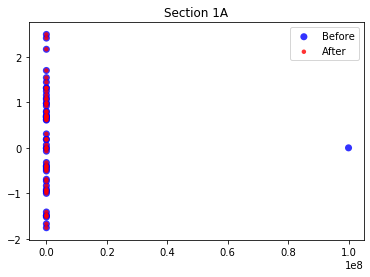

Before = -0.02783841399790179
After = 1.0


In [3]:
def section_1a():
    x_after = np.random.randn(50)
    y_after = x_after

    x_before = np.concatenate((x_after, np.array([100000000])))
    y_before = np.concatenate((y_after, np.array([0])))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(x_before, y_before, alpha=0.8, c="blue", edgecolors='none', s=50, label="Before")
    ax.scatter(x_after, y_after, alpha=0.8, c="red", edgecolors='none', s=20, label="After")
    plt.title('Section 1A')
    plt.legend(loc=0)
    plt.show()

    print("Before = " + str(pearsonr(x_before,y_before)[0]))
    print("After = " + str(pearsonr(x_after,y_after)[0]))
    
section_1a()

In [4]:
def calc_corr(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(x, y, alpha=0.8, c="blue", edgecolors='none', s=50)
    plt.show()

    t = kendalltau(x, y).correlation
    r = spearmanr(x, y).correlation
    p = pearsonr(x, y)[0]
    
    print("Kendall (t) = " + str(t))
    print("Spearman (r) = " + str(r))
    print("Pearson (p) = " + str(p))
    
    return t, r, p

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.4 

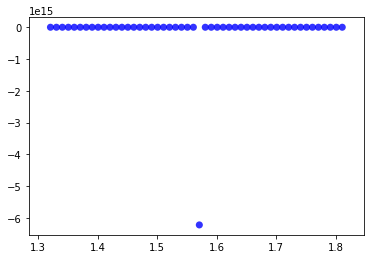

Kendall (t) = -0.020408163265306124
Spearman (r) = -0.5006002400960383
Pearson (p) = -0.004949706633402291
t > r + 0.4 (True)


In [5]:
def section_1b():
    x = np.arange(np.pi/2-0.25,np.pi/2+0.25,0.01)
    y = np.tan(x)

    t, r, p = calc_corr(x, y)
    value = t > r + 0.4
    print("t > r + 0.4 ({})".format(value))

    
section_1b()

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.4 

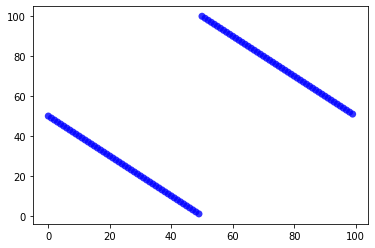

Kendall (t) = 0.010101010101010104
Spearman (r) = 0.5001500150015001
Pearson (p) = 0.5001500150015002
t < r - 0.4 (True)


In [6]:
def section_1b():
    x = np.arange(0, 100, 1)
    y = np.concatenate((np.arange(50, 0,-1), np.arange(100, 50, -1)))

    t, r, p = calc_corr(x, y)
    value = t < r - 0.4
    print("t < r - 0.4 ({})".format(value))
    
section_1b()

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

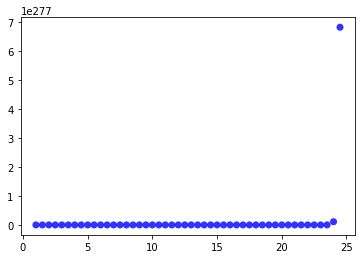

Kendall (t) = 1.0
Spearman (r) = 1.0
Pearson (p) = 0.25137946394680566
p < r - 0.6 (True)


In [7]:
def section_1d():
    x = np.arange(1, 25, 0.5)
    y = x**200

    t, r, p = calc_corr(x, y)
    value = p < r - 0.6
    print("p < r - 0.6 ({})".format(value))
    
section_1d()

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 1.2

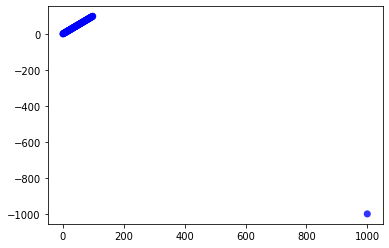

Kendall (t) = 0.9600000000000002
Spearman (r) = 0.9405940594059405
Pearson (p) = -0.8483769531160827
p < r - 1.2 (True)


In [8]:
def section_1e():
    x = np.concatenate((np.arange(0, 99, 1), np.array([1000])))
    y = np.concatenate((np.arange(0, 99, 1), np.array([-1000])))

    t, r, p = calc_corr(x, y)
    value = p < r - 1.2
    print("p < r - 1.2 ({})".format(value))
    
section_1e()

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

##### Answer:
That is impossible.

Although we can find examples where Kendall and Spearman correlations won't agree on the sign of the correlations (see the example of section_1f() ), they won't have major differences of 1.2 between one and other.

Since we are requested to get an example that thae differences between them is greater then 1, it means that one of them should be positive and another should be negative.
Kendall and Spearman use ranks, therefore we can't get this kind of a solution.

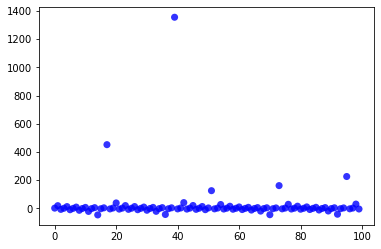

Kendall (t) = 0.0
Spearman (r) = 0.01014101410141014
Pearson (p) = -0.036652581222271816
np.sign(t) != np.sign(r) (True)


In [9]:
def section_1f():
    x = np.arange(0, 100, 1)
    y = np.concatenate((-6*np.tan(np.arange(50, 0,-1)), -5*np.tan(np.arange(100, 50, -1))))

    t, r, p = calc_corr(x, y)
    value = np.sign(t) != np.sign(r)
    print("np.sign(t) != np.sign(r) ({})".format(value))
    
section_1f()

### Question 2 - Analysis of the Indian Liver Patient Dataset (50 points)

Perform data analysis on the Indian Liver Patient Dataset
References:
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012. 
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.

Use the following link to find the details of the data: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine features for which you can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean.
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


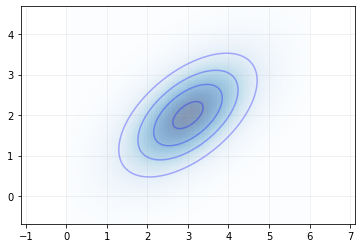

In [12]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    cov = cov.values
    
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
    

means = [3, 2]
cov = pd.DataFrame([[1, 0.5], [0.5, 0.8]])
plot_2d_Gaussian_pdf(means, cov)

###### Constants

In [14]:
# FILE
file_name = "liver.csv"

# COLUMNS
AGE = dict(column="Age", bins=90)
GENDER = dict(column="Gender", bins=2)
TB = dict(column="Total Bilirubin", bins=20)
DB = dict(column="Direct Bilirubin", bins=20)
ALKPHOS = dict(column="Alkaline Phosphotase", bins=20)
SGPT = dict(column="Alamine Aminotransferase", bins=20)
SGOT = dict(column="Aspartate Aminotransferase", bins=20)
TP = dict(column="Total Protiens", bins=20)
ALB = dict(column="Albumin", bins=20)
AG = dict(column="Ratio Albumin and Globulin Ratio", bins=20)
IS_SICK = dict(column="Selector field", bins=20)

MALE = "Male"
FEMALE = "Female"

SICK = 1
HEALTHY = 2

DIMENSION_COLUMNS = [
    AGE,
    GENDER,
    IS_SICK
]

METRIC_COLUMNS = [
    TB,
    DB,
    ALKPHOS,
    SGPT,
    SGOT,
    TP,
    ALB,
    AG
]

COLUMNS = [
    AGE, 
    GENDER, 
    TB,
    DB,
    ALKPHOS,
    SGPT,
    SGOT,
    TP,
    ALB,
    AG,
    IS_SICK
]

IS_LOG = [
    TB,
    DB,
    ALKPHOS,
    SGPT,
    SGOT
]

TITLES = [col["column"] for col in COLUMNS]

# READING FILE
csv_file = pd.read_csv(file_name, header=None, names=TITLES)
df = pd.DataFrame(csv_file, columns=TITLES)

##### Filling the empty cells

Note that only 4 cells in the column of "Ratio Albumin and Globulin Ratio" were empty.

In [15]:
def fill_empty_cells(df):
    rows = len(df.index)

    for column in METRIC_COLUMNS:
        col_name = column["column"]
        col_median = df[col_name].median()

        for i in range(rows):
            if pd.isnull(df.loc[i, col_name]):
                df.loc[i, col_name] = col_median
                print("The ecll [{}, {}] was empty, now it is filled with the value: {}".format(i, col_name, col_median))

    return df

# FILLING EMPTY CELLS
df = fill_empty_cells(df)

The ecll [209, Ratio Albumin and Globulin Ratio] was empty, now it is filled with the value: 0.93
The ecll [241, Ratio Albumin and Globulin Ratio] was empty, now it is filled with the value: 0.93
The ecll [253, Ratio Albumin and Globulin Ratio] was empty, now it is filled with the value: 0.93
The ecll [312, Ratio Albumin and Globulin Ratio] was empty, now it is filled with the value: 0.93


#### Confidence Intervals

Please note that I have decided to plot only the normal features.

The red lines represent the sick interval and the green the healthy interval.

In [76]:
def mean_confidence_interval(data, confidence):
    # https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m, 1), round(m-h, 1), round(m+h, 1)

~=~=~Total Bilirubin~=~=~
Healthy Interval: (3.5, 4.9), Sick Interval: (1.0, 1.3) (With confidence of 0.95)
In confidence of 0.95, we can state that the mean of sick people is GREATER than healty people

~=~=~Direct Bilirubin~=~=~
Healthy Interval: (1.6, 2.2), Sick Interval: (0.3, 0.5) (With confidence of 0.95)
In confidence of 0.95, we can state that the mean of sick people is GREATER than healty people

~=~=~Alkaline Phosphotase~=~=~
Healthy Interval: (293.1, 344.9), Sick Interval: (198.2, 241.3) (With confidence of 0.95)
In confidence of 0.95, we can state that the mean of sick people is GREATER than healty people

~=~=~Alamine Aminotransferase~=~=~
Healthy Interval: (79.1, 120.1), Sick Interval: (29.8, 37.5) (With confidence of 0.95)
In confidence of 0.95, we can state that the mean of sick people is GREATER than healty people

~=~=~Aspartate Aminotransferase~=~=~
Healthy Interval: (105.2, 170.2), Sick Interval: (35.1, 46.3) (With confidence of 0.95)
In confidence of 0.95, we can s

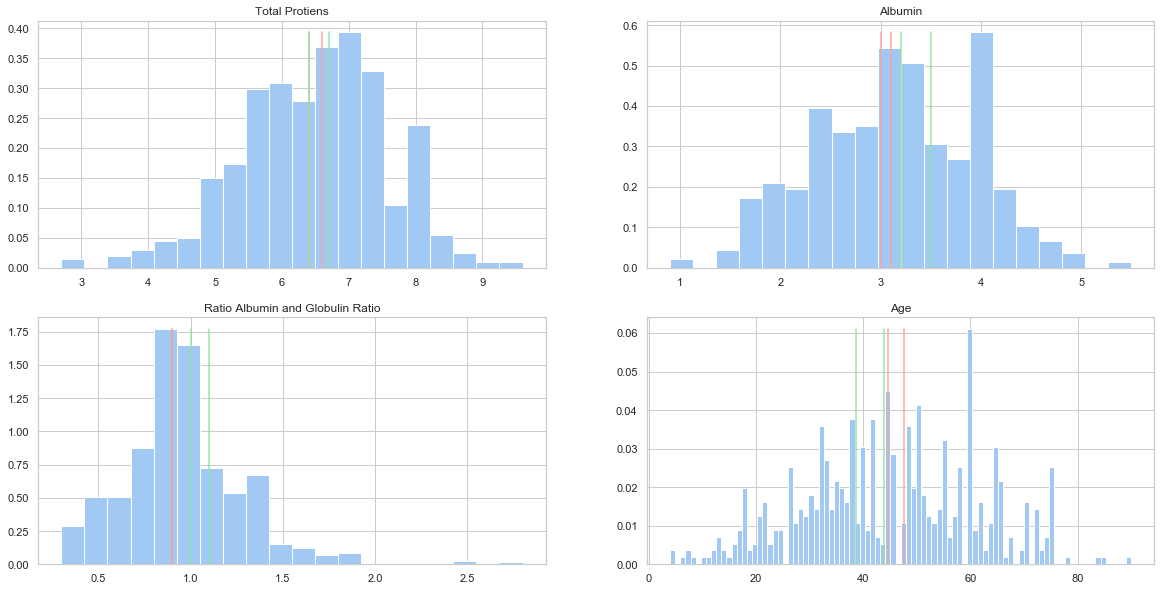

In [78]:
def confidence_interval(confidence=0.95):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

    i = 0
    for feature in METRIC_COLUMNS + [AGE]:
        r = int(i / 2)
        c = i % 2
        feature_name = feature["column"]
        sick_name = IS_SICK["column"]
        feature_bins = feature["bins"]

        specific_data = df[[feature_name, sick_name]]
        total_data = df[feature_name]
        max_data = total_data.max()
        sick_data = specific_data.loc[specific_data[sick_name] == SICK][feature_name]
        healthy_data = specific_data.loc[specific_data[sick_name] == HEALTHY][feature_name]
        med_sick, low_sick, high_sick = mean_confidence_interval(sick_data, confidence)
        med_healthy, low_healthy, high_healthy = mean_confidence_interval(healthy_data, confidence)
        
        if feature not in IS_LOG:
            axes[r, c].set_title(feature_name)
            values = axes[r, c].hist(total_data, bins=feature_bins, density=True)
            max_value = values[0].max()
            axes[r, c].plot([low_sick, low_sick], [0,max_value], color="r", alpha=0.9)
            axes[r, c].plot([high_sick, high_sick], [0,max_value], color="r", alpha=0.9)
            axes[r, c].plot([low_healthy, low_healthy], [0,max_value], color="g", alpha=0.9)
            axes[r, c].plot([high_healthy, high_healthy], [0,max_value], color="g", alpha=0.9)

            i += 1

        text_data = "Healthy Interval: ({}, {}), Sick Interval: ({}, {}) (With confidence of {})".format(low_sick, high_sick, low_healthy, high_healthy, confidence)
        
        if high_sick < low_healthy:
            result = "SMALLER" 
        elif high_healthy < low_sick:
            result = "GREATER"
        else:
            result = "UNKNOWN"
        if result is not "UNKNOWN":
            text_conclusion = "In confidence of {}, we can state that the mean of sick people is {} than healty people".format(confidence, result)
        else:
            text_conclusion = "In confidence of {}, we don't know which mean is greater".format(confidence)
        print("~=~=~{}~=~=~".format(feature_name))
        print(text_data)
        print(text_conclusion)
        print()

confidence_interval(0.95)

#### Histograms

Please note that that 5 of the graphs seem to be log-normal:

Total Bilirubin

Direct Bilirubin

Alkaline Phosphotase

Alamine Aminotransferase

Aspartate Aminotransferase

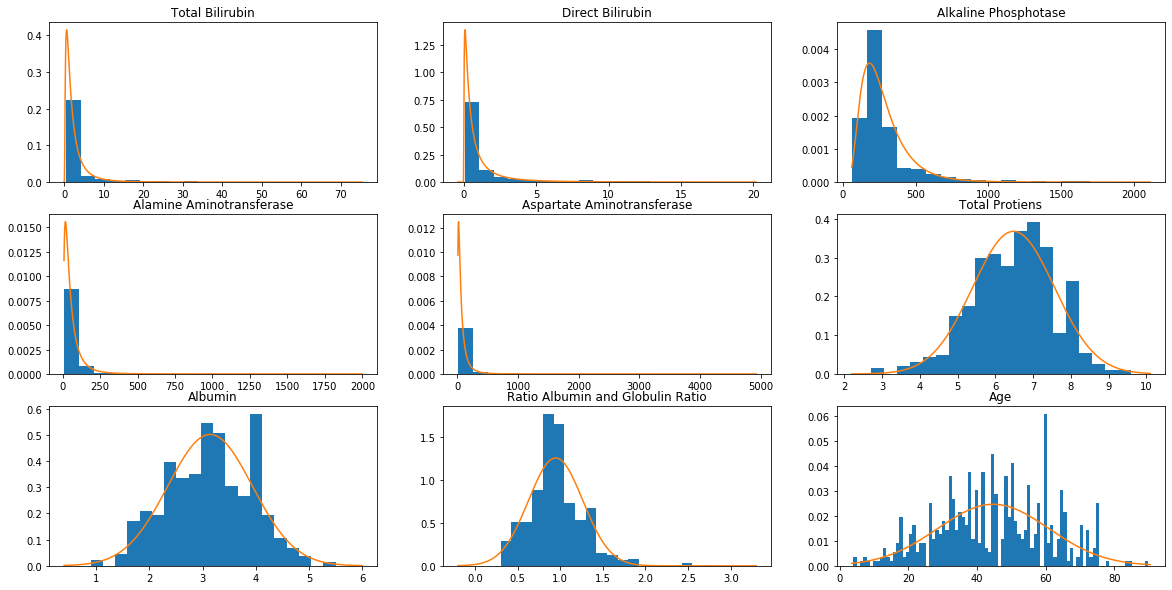

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

i = 0
for feature in METRIC_COLUMNS + [AGE]:
    r = int(i / 3)
    c = i % 3
    feature_name = feature["column"]
    feature_bins = feature["bins"]
    curr_df = df[feature_name]
    is_log = feature in IS_LOG
    x = np.linspace(curr_df.min()-0.5, curr_df.max()+0.5, 800)
    if is_log:
        s, loc, scale = stats.lognorm.fit(curr_df, floc=0)  # floc=0 so we will see DB
        curr_pdf = stats.lognorm(s=s, loc=loc, scale=scale).pdf(x)
    else:
        loc, scale = stats.norm.fit(curr_df)
        curr_pdf = stats.norm(loc=loc, scale=scale).pdf(x)
    axes[r, c].set_title(feature_name)
    axes[r, c].hist(curr_df, bins=feature_bins, density=True)
    axes[r, c].plot(x, curr_pdf)
    i+=1

#### Correlations

Main conclusions:

1. There are four features that seem to have a positive correlation:

a. Total Bilirubin, Direct Bilirubin: It is mostly because they calculated as: Total = Direct + Indirect (https://en.wikipedia.org/wiki/Bilirubin)

b. Alamine Aminotransferase (ALT), Aspartate Aminotransferase (AST): These enzymes seem to be together (https://labtestsonline.org/tests/aspartate-aminotransferase-ast) 

c. Albumin, Total Protein: Albumin is made by the liver and makes up about 60% of the total protein. (https://labtestsonline.org/tests/total-protein-albumin-globulin-ag-ratio)

d. Albumin, Ratio (Ablumin / Globulin): The Albumin is in the nominator, and of course they will have positive correlation.

2. There aren't significant negative correlations (should be shown in white)

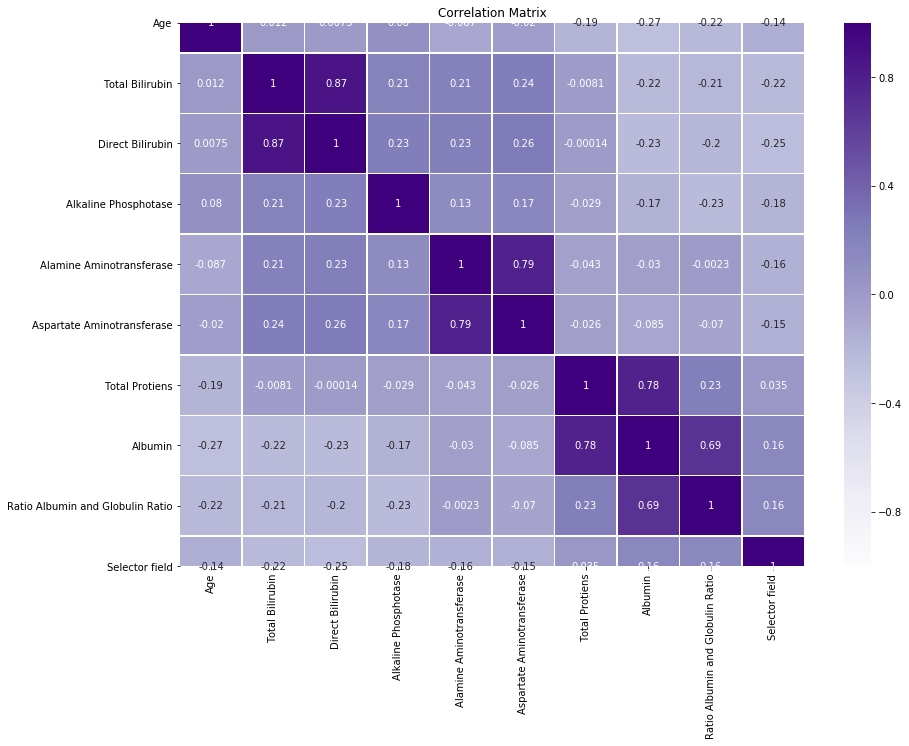

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='Purples', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

#### Correlations for select pairs

Please note that for some of the following tuples, the Gaussian PDF might be not right, since one or both of the features distribute as log-normal.


a. Total Bilirubin, Direct Bilirubin: BOTH DISTRIBUTE LOG-NORMALLY

b. Alamine Aminotransferase (ALT), Aspartate Aminotransferase (AST):  BOTH DISTRIBUTE LOG-NORMALLY

c. Albumin, Total Protein

d. Albumin, Ratio (Ablumin / Globulin)


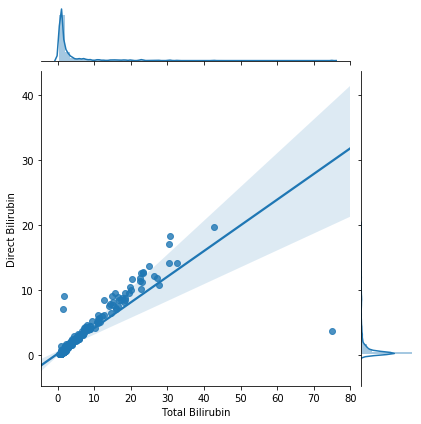

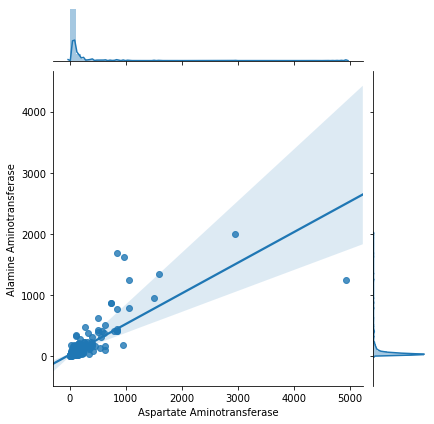

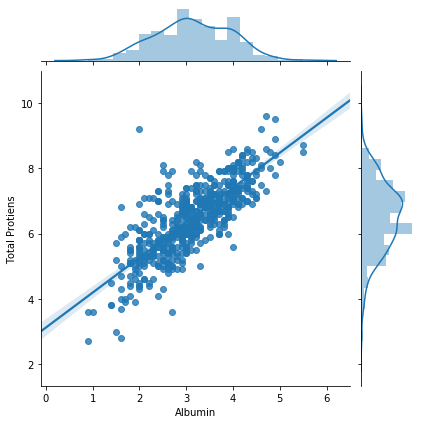

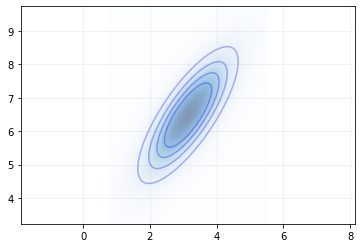

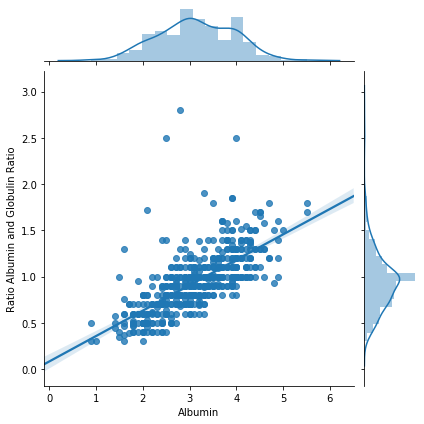

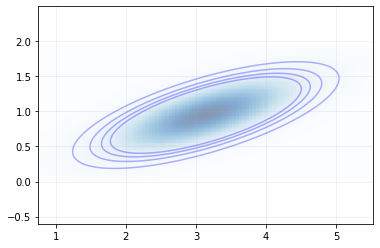

In [18]:
CORR_TUPLES = [
    (TB, DB, False),
    (SGOT, SGPT, False),
    (ALB, TP, True),
    (ALB, AG, True)
]

for curr_tuple in CORR_TUPLES:
    col1 = curr_tuple[0]["column"]
    col2 = curr_tuple[1]["column"]
    
    mean1 = df[col1].mean()
    mean2 = df[col2].mean()
    means = [mean1, mean2]
    cov = df[[col1, col2]].cov()
    
    sns.jointplot(col1, col2, df, kind="reg")
    if curr_tuple[2]:
        plot_2d_Gaussian_pdf(means, cov)  

#### Correlations between Gender and Sickness

Please note that sick is signed as 1 (and healthy is 2).


For males, the correlations seems to be pretty similar to the whole group:
a. Total Bilirubin, Direct Bilirubin

b. Alamine Aminotransferase (ALT), Aspartate Aminotransferase (AST):  BOTH DISTRIBUTE LOG-NORMALLY

c. Albumin, Total Protein

d. Albumin, Ratio (Ablumin / Globulin)


--------

Yet, for female, it seems like there is a correlation between all the following five features:

Total Bilirubin, Direct Bilirubin, Alamine Aminotransferase (ALT), Aspartate Aminotransferase (AST), Alkaline Phosphotase

And between all the following three:

Albumin, Total Protein, Ratio (Ablumin / Globulin)

-------

For sick and healthy the correlations are almost the same.

With a small check, it looks like there are 65% sick females (out of all females), means that the correlation might be similar.

In [75]:
male_df = df.loc[df[GENDER["column"]] == MALE]
female_df = df.loc[df[GENDER["column"]] == FEMALE]
sick_df = df.loc[df[IS_SICK["column"]] == SICK]
healthy_df = df.loc[df[IS_SICK["column"]] == HEALTHY]
SUB_DF = [
    dict(data=male_df, name=MALE),
    dict(data=female_df, name=FEMALE),
    dict(data=sick_df, name="Sick"),
    dict(data=healthy_df, name="Healty")
]

female_sick_df = df.loc[(df[GENDER["column"]] == FEMALE) & (df[IS_SICK["column"]] == SICK)]
print("Total Female = {} Total Sick Female = {}, Ratio = {}". format(len(female_df), len(female_sick_df), len(female_sick_df)/len(female_df)))

Total Female = 142 Total Sick Female = 92, Ratio = 0.647887323943662


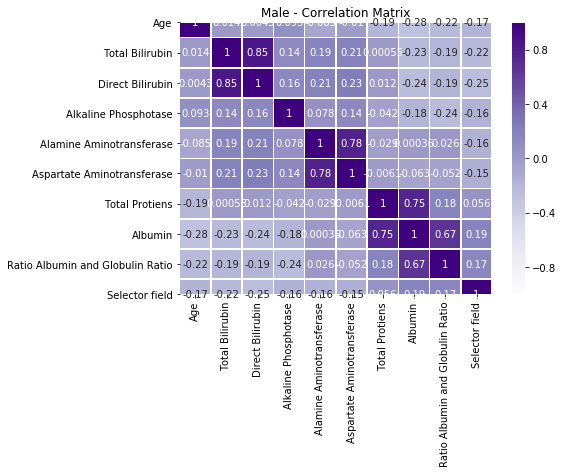

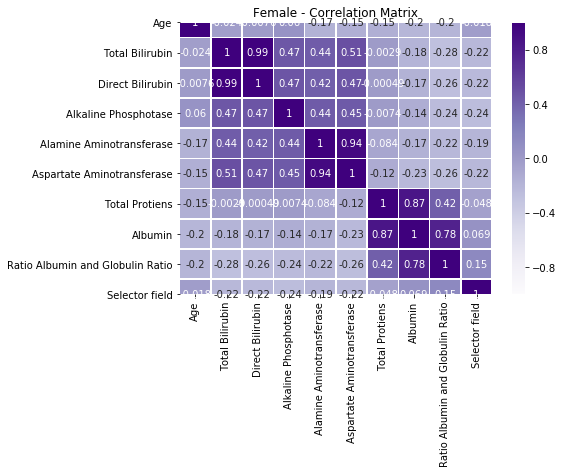

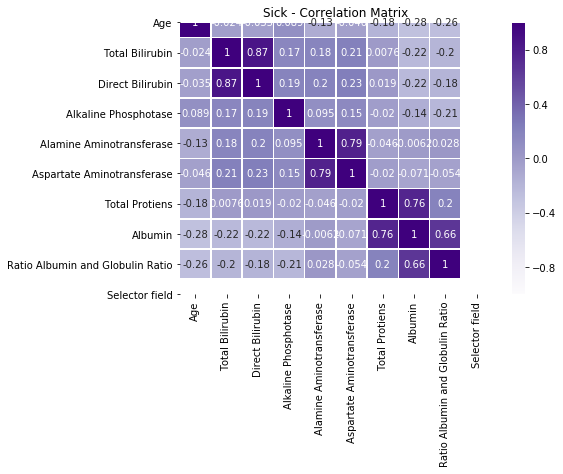

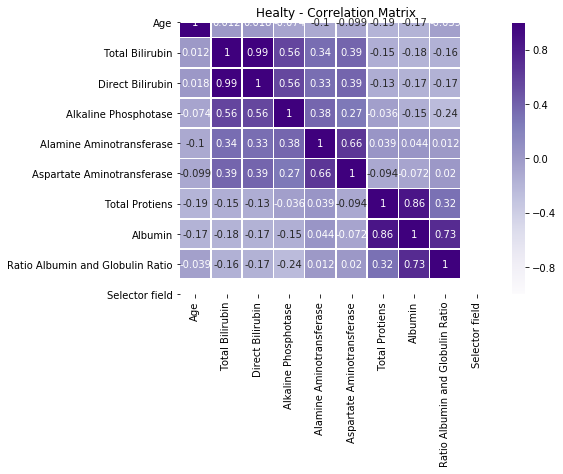

In [20]:
for sub_df in SUB_DF:
    plt.figure(figsize=(7,5))
    sns.heatmap(sub_df["data"].corr(), annot=True, cmap='Purples', linewidths=0.5, vmin=-1, vmax=1)
    plt.title("{} - Correlation Matrix".format(sub_df["name"]))
    plt.show()

#### Preparing data by age

In [62]:
age_df = df.copy()

for t in range(0, 9):
    min_age = 10*t + 1
    max_age = 10*(t+1)
    interval_name = "{}-{}".format(min_age, max_age)
    age_df.loc[(age_df[AGE["column"]] >= min_age) & (age_df[AGE["column"]] <= max_age), AGE["column"]] = min_age

#### Comparing with Age

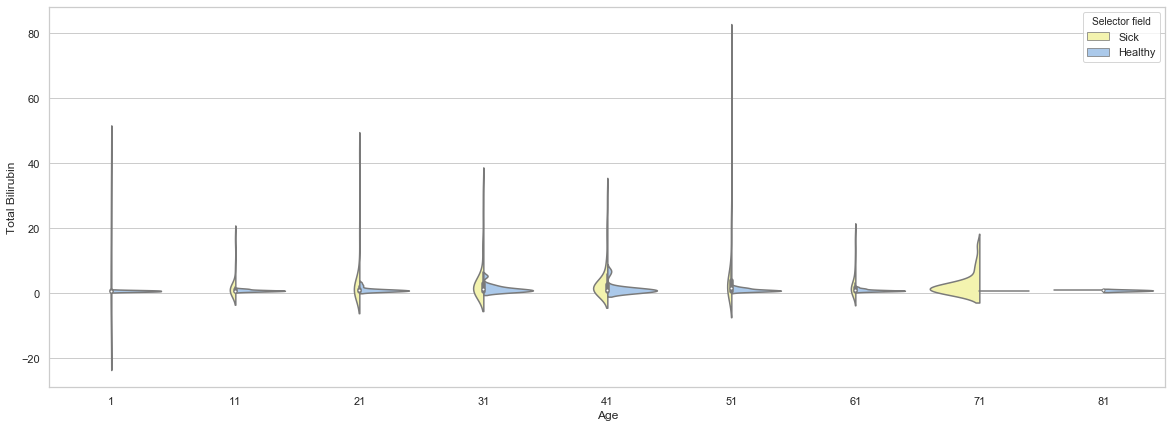

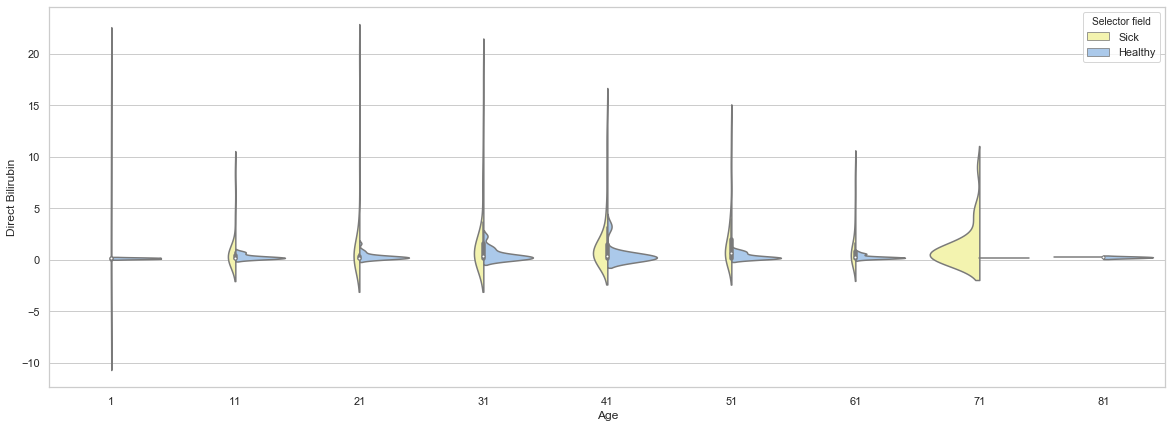

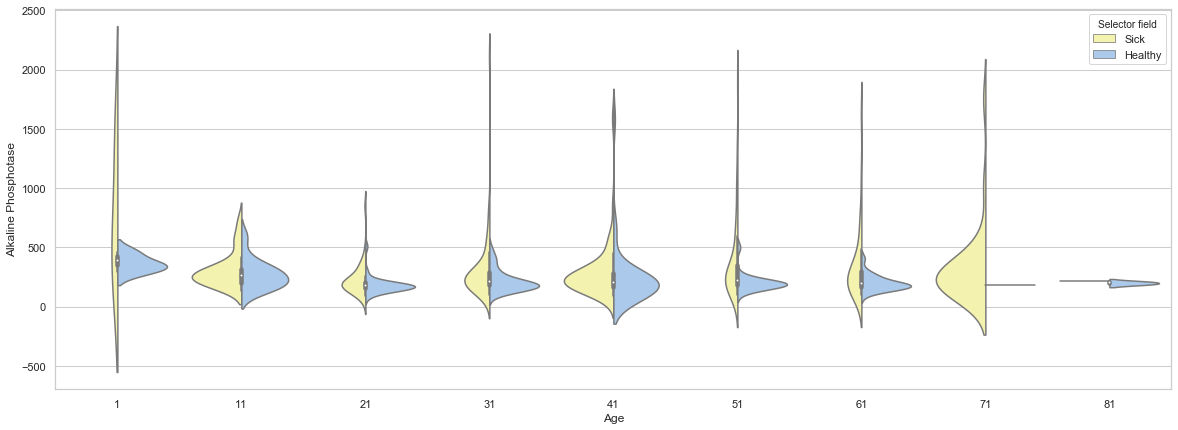

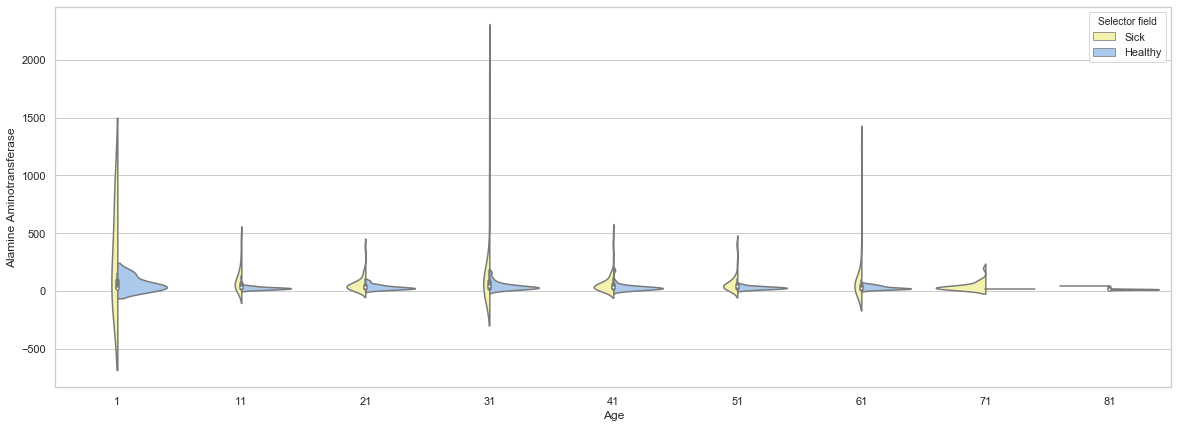

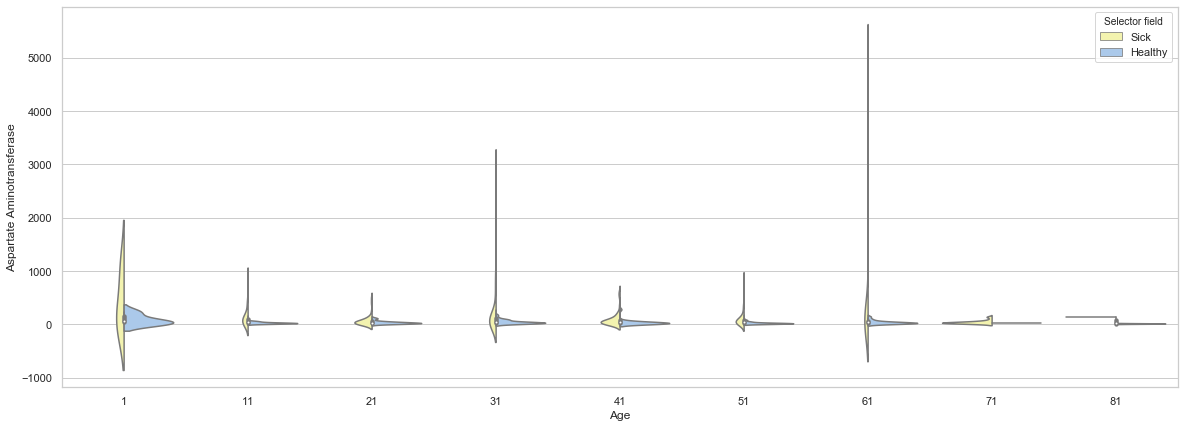

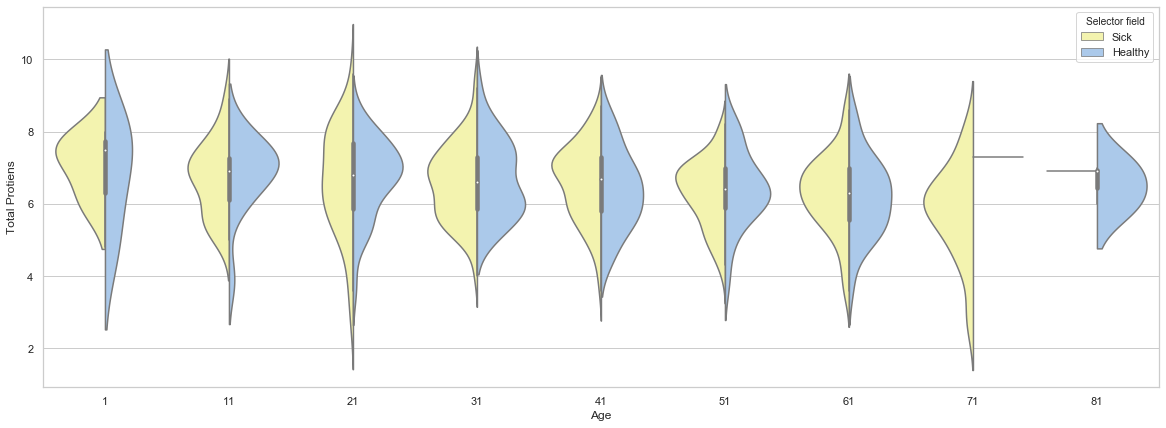

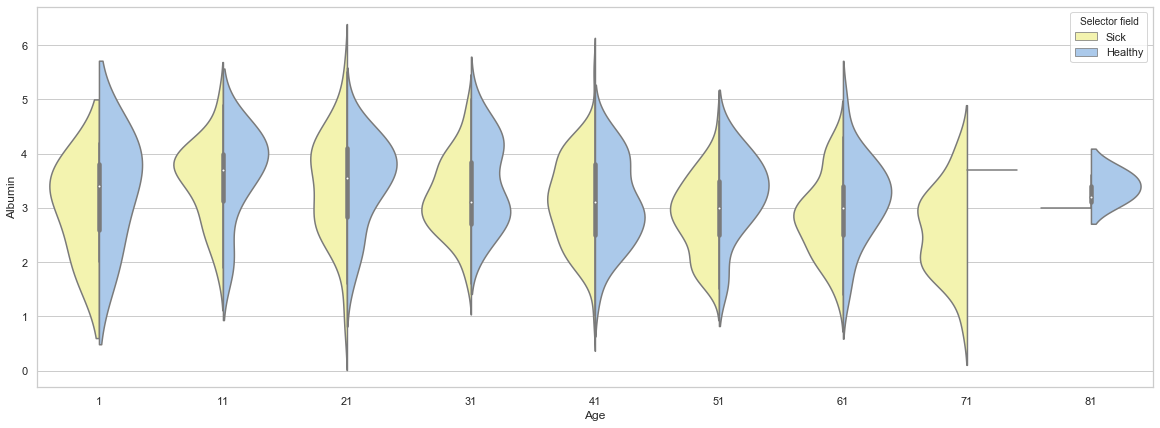

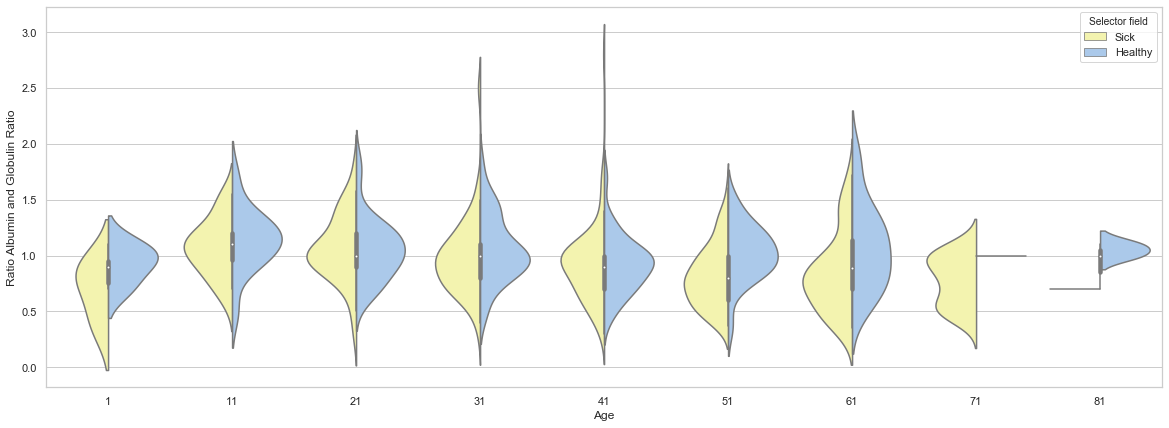

In [64]:
def violins():
    age_df.loc[age_df[IS_SICK["column"]] == SICK, [IS_SICK["column"]]] = "Sick"
    age_df.loc[age_df[IS_SICK["column"]] == HEALTHY, [IS_SICK["column"]]] = "Healthy"
    for metric in METRIC_COLUMNS:
        plt.figure(figsize=(20,7))
        sns.set(style="whitegrid", palette="pastel", color_codes=True)
        sns.violinplot(x=AGE["column"], y=metric["column"], hue=IS_SICK["column"], split=True,
                       palette={"Sick": "y", "Healthy": "b"},
                       data=age_df)
        plt.show()
violins()

#### Original Question

##### If we divide the while group into two sub-groups per feature: low (lower than the median for the specific feature) and high (higher than the median for the specific feature). Is there any correlations that are different?

The correlation heatmaps are shown below.

Unfortunately, this check hasn't led to interesting conclusions.

Yet, the only conclusion that is interesting is for Alamine Aminotransferase:
We can see that for the lower group (10 < x <= 35), there is a negative correlation for Total Protein, Albumin and the ratio between Albumin and Globulin. Please note that this correlation is about -0.1 (while for the higher group is at about 0.05). This is interesting to see that when there is lower Alamine, it may cause weird behaviour for the three features above (greater TP => less Albumin, for example). Yet, we should be careful with that discovery, since the correlation is not that distinguished.

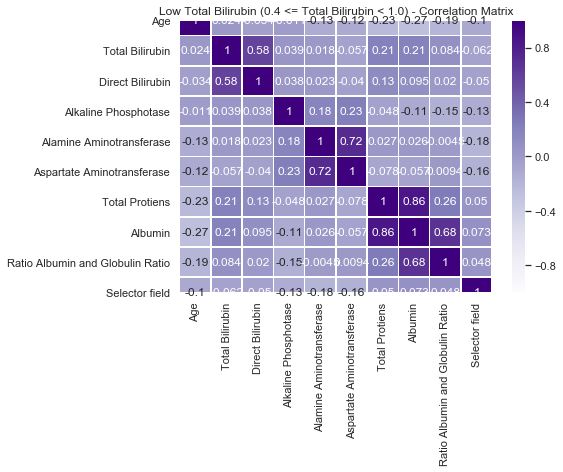

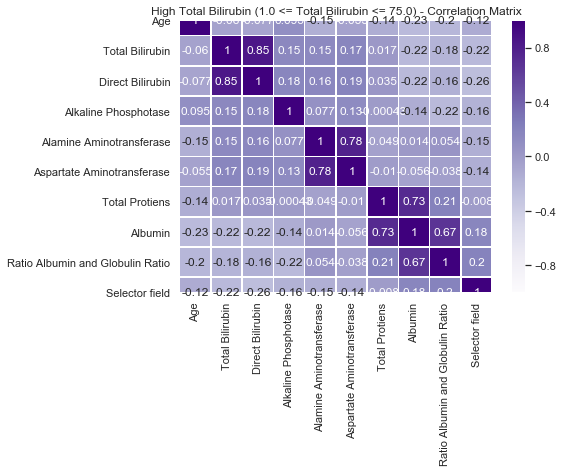

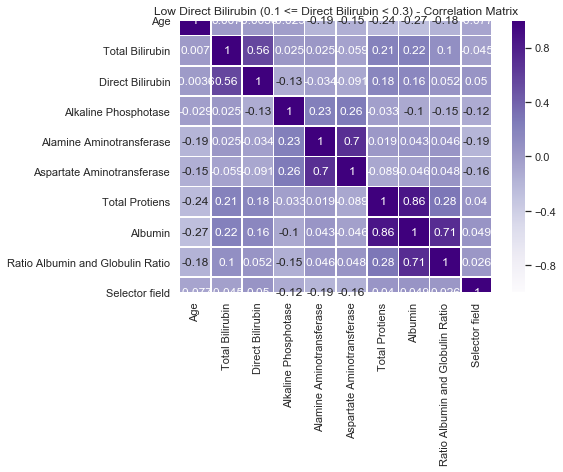

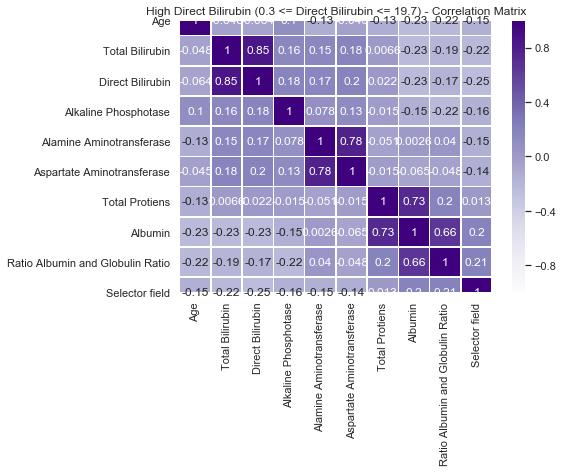

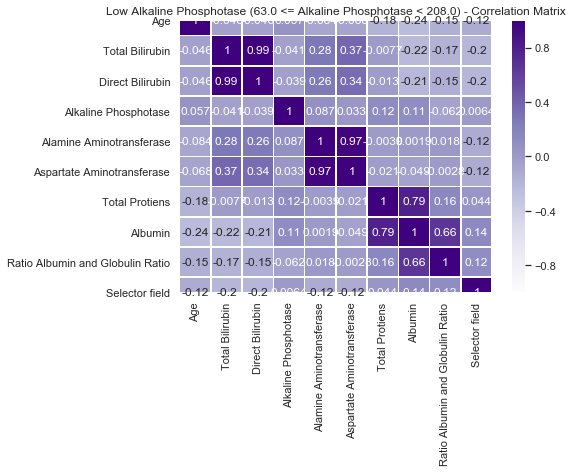

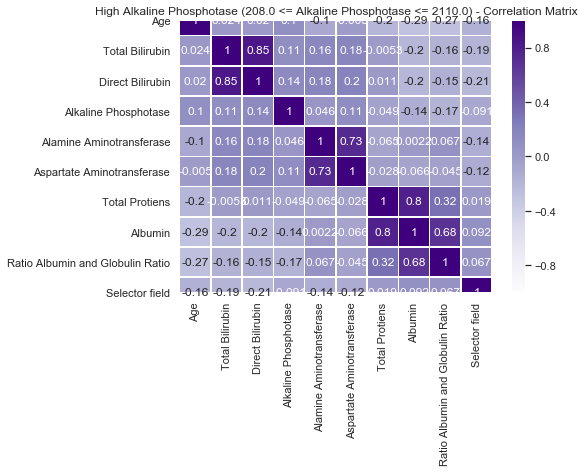

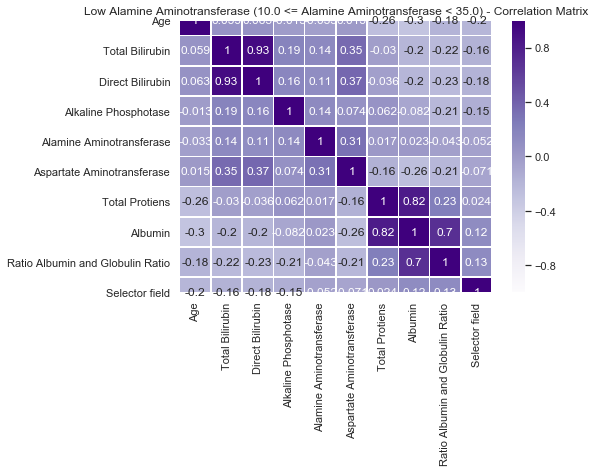

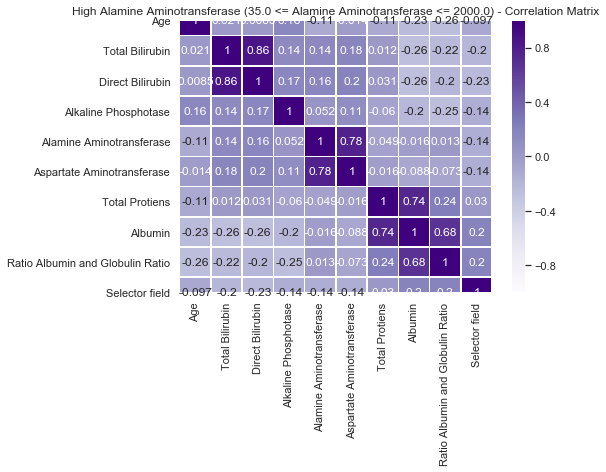

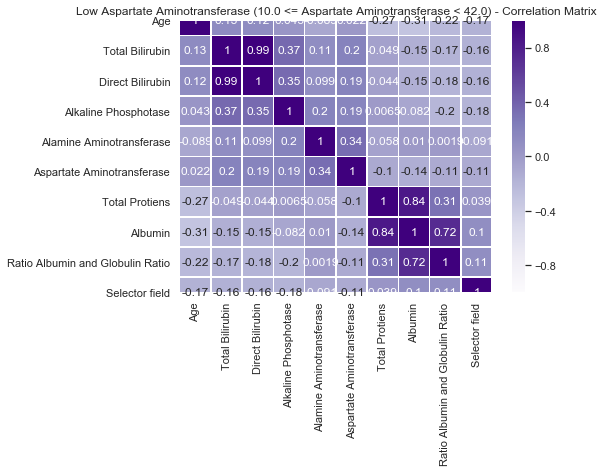

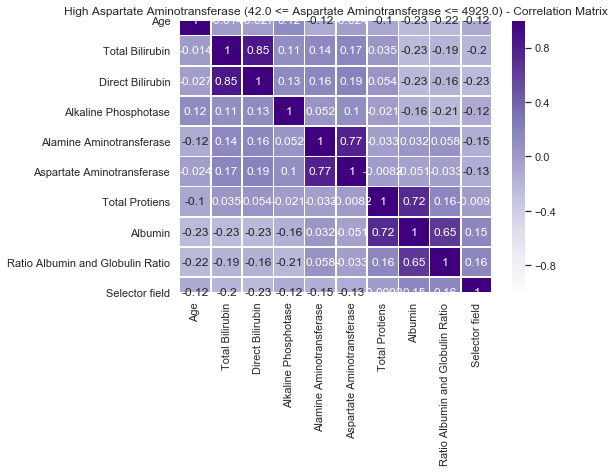

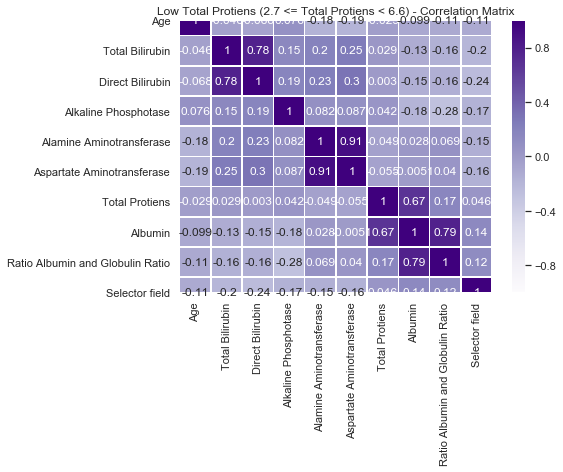

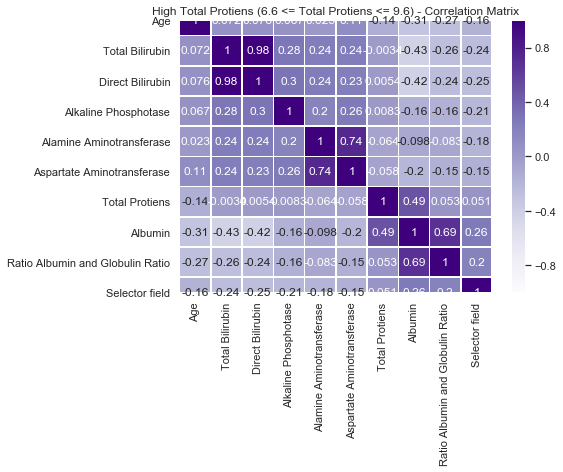

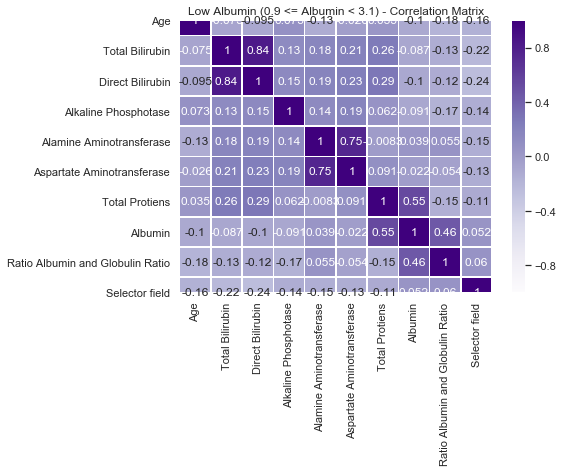

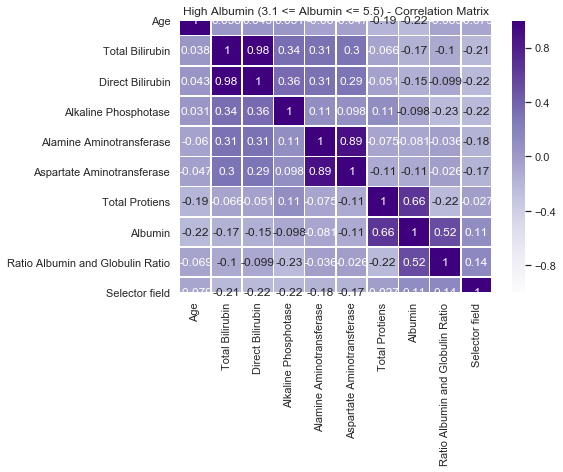

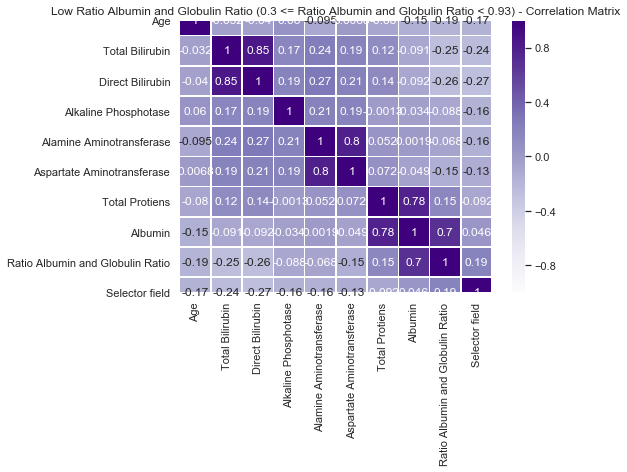

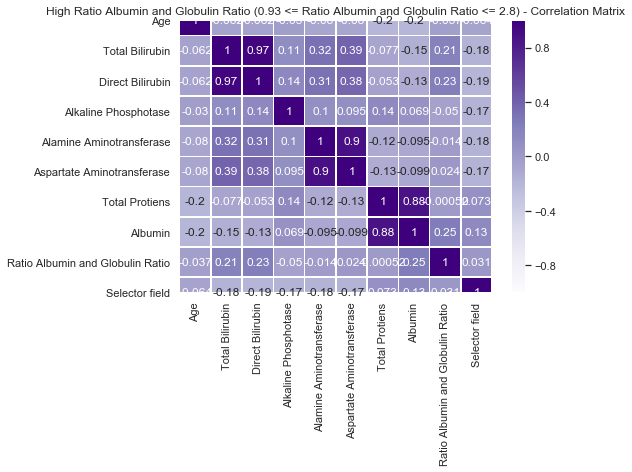

In [69]:
def original_question(chosen_feature):
    chosen_median = df[chosen_feature["column"]].median()
    chosen_min = df[chosen_feature["column"]].min()
    chosen_max = df[chosen_feature["column"]].max()
    
    low_chosen_df = df.loc[df[chosen_feature["column"]] < chosen_median]
    high_chosen_df = df.loc[df[chosen_feature["column"]] >= chosen_median]
    
    SUB_DF = [
        dict(data=low_chosen_df, name="Low {name} ({l} <= {name} < {h})".format(name=chosen_feature["column"], l=chosen_min, h=chosen_median)),
        dict(data=high_chosen_df, name="High {name} ({l} <= {name} <= {h})".format(name=chosen_feature["column"], l=chosen_median, h=chosen_max))
    ]

    for sub_df in SUB_DF:
        plt.figure(figsize=(7,5))
        sns.heatmap(sub_df["data"].corr(), annot=True, cmap='Purples', linewidths=0.5, vmin=-1, vmax=1)
        plt.title("{} - Correlation Matrix".format(sub_df["name"]))
        plt.show()

for feature in METRIC_COLUMNS:
    original_question(feature)

### Question 3 - Log Normal (15 points)

Consider Y1 ~ LogNormal(0,0.25) (recall that μ and σ are the mean and std of the underlying normal distribution)  and Y2 ~ LogNormal(0,1).

In [19]:
y1 = lognorm(s=0.5, loc=0)
y2 = lognorm(s=1, loc=0)

x = np.linspace(0, 10, 10000)

#### 3.A
Draw a plot of the pdfs for Y1 and Y2 on the same axes, over the x range of [0 10].

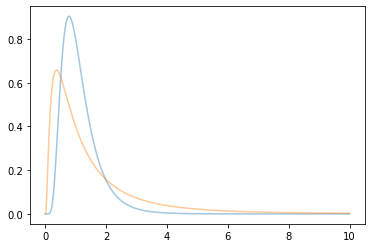

In [13]:
def section_3a():
    plt.plot(x, y1.pdf(x), alpha=0.42);
    plt.plot(x, y2.pdf(x), alpha=0.42);
    
section_3a()

#### 3.B
What is E(Y1)? E(Y2)?

In [14]:
def section_3b():
    print("E(Y1) = " + str(y1.mean()))
    print("E(Y2) = " + str(y2.mean()))
    
section_3b()

E(Y1) = 1.1331484530668263
E(Y2) = 1.6487212707001282


#### 3.C
What is the probability of Y1 being more than 4 stds larger than its mean?

In [15]:
def calc_greater(y):
    value = 4*y.std() + y.mean()
    probability = 1 - y.cdf(value)
    return probability
    
def section_3c():
    p = calc_greater(y1)
    print("P(Y1 > 4*sigma + mu) = " + str(p))
    
section_3c()

P(Y1 > 4*sigma + mu) = 0.005651464249383009


#### 3.D
What is the probability of Y2 being more than 4 stds larger than its mean?

In [16]:
def section_3d():
    p = calc_greater(y2)
    print("P(Y2 > 4*sigma + mu) = " + str(p))
    
section_3d()

P(Y2 > 4*sigma + mu) = 0.009863144516957023


#### 3.E
What is the IQR of Y1? Of Y2?

In [17]:
def calc_iqr(y):
    result = y.ppf(0.75) - y.ppf(0.25)
    return result

def section_3e():
    print("IQR(Y1) = " + str(calc_iqr(y1)))
    print("IQR(Y2) = " + str(calc_iqr(y2)))
    
section_3e()

IQR(Y1) = 0.6873480690461962
IQR(Y2) = 1.4536148002949796


### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.5 & 0.2 & 0.05 & 0 & 0.05 & 0.2 \\
0.2 & 0.5 & 0.2 & 0.05 & 0 & 0.05 \\
0.05 & 0.2 & 0.5 & 0.2 & 0.05 & 0 \\
0 & 0.05 & 0.2 & 0.5 & 0.2 & 0.05 \\
0.05 & 0 & 0.05 & 0.2 & 0.5 & 0.2 \\
0.2 & 0.05 & 0 & 0.05 & 0.2 & 0.5
\end{pmatrix}
\end{equation*}

#### Answer:
We will pay attention that the initial p is the stationary state.

That means that we don't have to use Markov Chain tools, and see it as a uniform RV!

In [306]:
T = np.array([[0.5, 0.2, 0.05, 0, 0.05, 0.2],
              [0.2, 0.5, 0.2, 0.05, 0, 0.05],
              [0.05, 0.2, 0.5, 0.2, 0.05, 0],
              [0, 0.05, 0.2, 0.5, 0.2, 0.05],
              [0.05, 0, 0.05, 0.2, 0.5, 0.2],
              [0.2, 0.05, 0, 0.05, 0.2, 0.5]])
p = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

p_next = p.dot(T)
print("p_next = ", p_next)
if list(p) == list(p_next):
    print("p is the stationary state!")

p_next =  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
p is the stationary state!


In [2]:
p = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
values = np.array([1, 2, 3, 4, 5, 6])

def trajectory(length):
    rolls = stats.rv_discrete(name="curr p", values=(values, p)).rvs(size=length)
    return rolls

def experiment(trajectories, length):
    avgs = list()

    for i in range(trajectories):
        curr_roll = trajectory(length)
        curr_sum = np.array(curr_roll).sum()
        curr_avg = curr_sum / length
        avgs.append(curr_avg)
    
    return avgs

#### 4.A
Construct 1000 trajectories, each of length 20.
1. What do you expect the average value of all 20 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [3]:
def section_4ab(trajectories, length):
    avgs = experiment(trajectories, length)
    
    # the histogram of the data
    n, bins, patches = plt.hist(avgs, 100, facecolor='green', alpha=0.75)
    
    # best fit of data
    (mu, sigma) = norm.fit(avgs)
    print("Estimated Mean = {} STD = {}".format(mu, sigma))
    plt.show()
    
    return avgs, mu, sigma

#### 4.B
Construct 1000 trajectories, each of length 2000.
1. What do you expect the average value of all 2000 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

### Please note: The answers should be the same for sections B+C (because it is the same distribution).
#### Answer 1:
Since it is a uniform RV, the expectation should be $(1+2+...+6)/6=3.5$
#### Answer 2:
Please see the graphs bellow.
#### Answer 3:
Since the results are independent of each other, by the CLT, the distribution should be Normal (with mean = 3.5). The estimated mean and STD are written.

Estimated Mean = 3.4984 STD = 0.3769117138004602


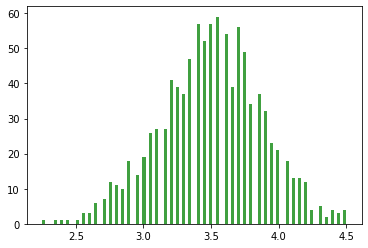

In [4]:
avgs_a, mu_a, sigma_a = section_4ab(1000, 20)

Estimated Mean = 3.500594 STD = 0.038327753182256855


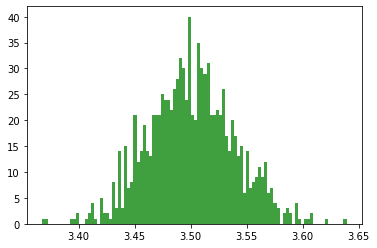

In [5]:
avgs_b, mu_b, sigma_b = section_4ab(1000, 2000)

#### 4.C
Draw normal fit curves on your two histograms.

In [82]:
def section_4c(avgs, mu, sigma):
    ax = sns.distplot(avgs, bins=25, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
    ax.set(xlabel='bins', ylabel='Frequency')
    plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


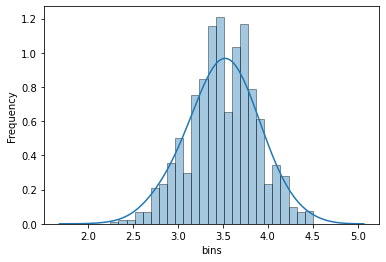

In [83]:
section_4c(avgs_a, mu_a, sigma_a)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


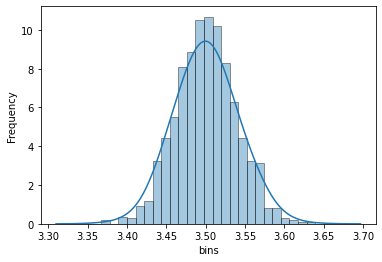

In [84]:
section_4c(avgs_b, mu_b, sigma_b)

#### 4.D - Bonus
Can you try to formulate a CLT for Markov chains from your findings?

#### Answer:
Let the following:
A transition square matrix T.
A finite state space $\{S_1, S_2, ..., S_k\}$.

A distribution $D$ that is stationary for $T$, s.t. $\forall X\sim D, P(X = :) \cdot T = P(X=:)$

Then,
$\{X_1, X_2, ..., X_n\}$ RV with distribution D with mean $\mu$ and (finite non 0) variance $\sigma^2$.
We will assign $X_n$ as the average of $X_1, ..., X_n$.
then for any fixed number x, the CLT is true.

Proof:
Since we use only stationary states, we use RVs that distribute the same and each state  is sampled independently. It fulfils the demands of the CLT, then the CLT is true.


 